# 4. H2: The experimental group will interact more with the LMS

* **author** = Diego Sapunar-Opazo
* **copyright** = Copyright 2019, Thesis M.Sc. Diego Sapunar - Pontificia Universidad Católica de Chile
* **credits** = Diego Sapunar-Opazo, Ronald Perez, Mar Perez-Sanagustin, Jorge Maldonado-Mahauad
* **maintainer** = Diego Sapunar-Opazo
* **email** = dasapunar@uc.cl
* **status** = Dev

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# stats
from scipy.stats import ttest_ind

## Part 1: Getting the Data

In [2]:
df_sec = pd.read_csv('../../data/clean_data/students_sec.csv')
df_clusters = pd.read_csv('../../data/final_data/students_clusters.csv')
df_interactions = pd.read_csv('../../data/final_data/coursera_students_interactions_nueva.csv', low_memory=False)
df_grades = pd.read_csv('../../data/final_data/performance_weekly.csv')
df_dedicated = pd.read_csv('../../data/final_data/dedicated_time_report.csv').iloc[:,[0,1,3,4]]

## Part 2: Preparing the data

In [3]:
df_interactions.interaction.unique()

array(['Assessment try', 'Video-Lecture begin', 'Video-Lecture completed',
       'Video-Lecture review', 'Reading completed', 'Assessment pass',
       'Assessment review', 'Reading review'], dtype=object)

In [4]:
interaction_type = 'Assessment review'
# interaction_type = ''

if interaction_type != '':
    aux_number_interactions = df_interactions[df_interactions['interaction'] == interaction_type][['num_alumno', 'week', 'interaction']].groupby(['num_alumno', 'week']).count()
    aux_timespent = df_interactions[df_interactions['interaction'] == interaction_type][['num_alumno', 'week', 'timespent']].groupby(['num_alumno', 'week']).sum()
    
else:
    aux_number_interactions = df_interactions[['num_alumno', 'week', 'interaction']].groupby(['num_alumno', 'week']).count()
    aux_timespent = df_interactions[['num_alumno', 'week', 'timespent']].groupby(['num_alumno', 'week']).sum()

In [5]:
df_number_interactions = pd.melt(aux_number_interactions['interaction'].unstack(level=1).reset_index(), id_vars=['num_alumno'], value_name='number_interactions')
df_timespent = pd.melt(aux_timespent['timespent'].unstack(level=1).reset_index(), id_vars=['num_alumno'], value_name='timespent')

df_number_interactions.fillna(0, inplace=True)
df_timespent.fillna(0, inplace=True)

del aux_number_interactions
del aux_timespent

In [6]:
# merging all data
df = pd.merge(left=df_number_interactions, right=df_timespent, left_on=['num_alumno', 'week'], right_on=['num_alumno', 'week'])
df = pd.merge(left=df, right=df_sec, left_on='num_alumno', right_on='num_alumno')
df = pd.merge(left=df, right=df_clusters, left_on='num_alumno', right_on='num_alumno')

In [7]:
df[df['num_alumno'] == '15622606']

,num_alumno,week,number_interactions,timespent,sec,cluster
836,15622606,1.0,725.0,3642.099000,1,2
837,15622606,2.0,655.0,2346.833273,1,2
838,15622606,3.0,2156.0,5533.391976,1,2
839,15622606,4.0,1404.0,968.499500,1,2
840,15622606,5.0,1233.0,643.845478,1,2
841,15622606,6.0,301.0,561.442909,1,2
842,15622606,7.0,0.0,0.000000,1,2
843,15622606,8.0,3752.0,13031.498637,1,2
844,15622606,9.0,0.0,0.000000,1,2
845,15622606,10.0,0.0,0.000000,1,2


In [8]:
df.head()

,num_alumno,week,number_interactions,timespent,sec,cluster
0,10635815,1.0,826.0,5525.089800,2,0
1,10635815,2.0,1350.0,2999.724038,2,0
2,10635815,3.0,6104.0,18557.483270,2,0
3,10635815,4.0,976.0,3585.809314,2,0
4,10635815,5.0,825.0,7841.223677,2,0


## Part 3: Visualizing

In [9]:
len(df.num_alumno.unique())

184

In [10]:
DELETE_EXAMS = False

### (3.1) Number of Interactions

#### (3.1.1) All interactions

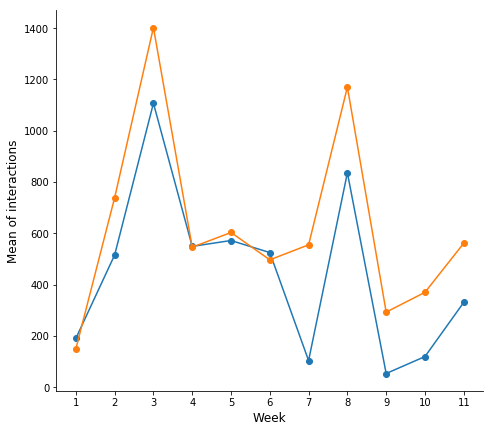

In [12]:
if DELETE_EXAMS:
    aux_mean = df[(df['week'] != 3) & (df['week'] != 8) & (df['week'] != 11)].groupby(['week', 'sec'])[['number_interactions']].mean()
    
else:
    aux_mean = df.groupby(['week', 'sec'])[['number_interactions']].mean()

fig = plt.figure(figsize=(26,7))
ax1 = fig.add_subplot(1,3,1)

# plotting
aux_mean['number_interactions'].unstack(level=1).plot.line(ax=ax1, legend=False,marker='o')

# setting title
# ax1.set_title('Students\' Interactions by week \n Control Group (Blue) and Experimental Group (Orange)', 
#               fontsize=15)

# axis Labels
ax1.set_ylabel('Mean of interactions', fontsize=12)
ax1.set_xlabel('Week', fontsize=12)

# tick styles
ax1.tick_params(axis='both', which='major', labelsize=10)
ax1.set_xticks([1,2,3,4,5,6,7,8,9,10,11])

# set cool Legend format
# ax1.legend(labels=['Control Group (mean=' + str(int(aux_mean['number_interactions'].unstack(level=1)[1].mean())) +')',
#                    'Experimental Group (mean=' + str(int(aux_mean['number_interactions'].unstack(level=1)[2].mean())) +')'], 
#            loc='best', 
#            fontsize=11, 
#            frameon=True).get_frame().set_edgecolor('blue')

# selecting spines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(True)
ax1.spines['left'].set_visible(True)

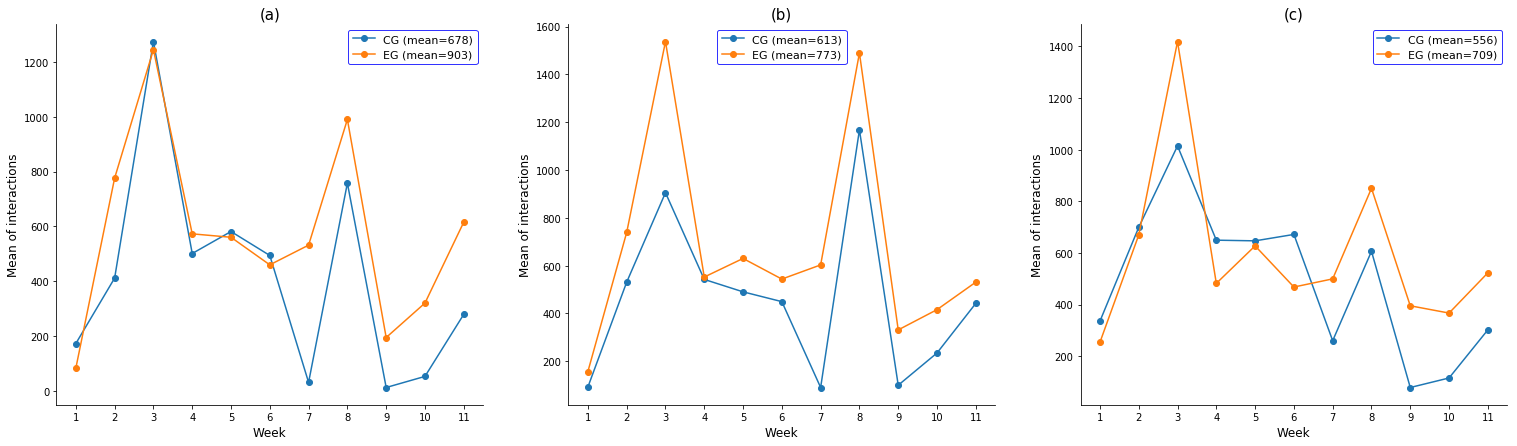

In [13]:
if DELETE_EXAMS:
    aux_mean = df[(df['week'] != 3) & (df['week'] != 8) & (df['week'] != 11)].groupby(['week', 'cluster', 'sec'])[['number_interactions']].mean()
    
else:
    aux_mean = df.groupby(['week', 'cluster', 'sec'])[['number_interactions']].mean()


fig, axs = plt.subplots(1,3, figsize=(26, 7))

# plotting
aux_mean['number_interactions'].unstack(level=[1,2])[2].plot(ax=axs[0], legend='best', marker='o')
aux_mean['number_interactions'].unstack(level=[1,2])[0].plot(ax=axs[1], legend='best', marker='o')
aux_mean['number_interactions'].unstack(level=[1,2])[1].plot(ax=axs[2], legend='best', marker='o')

# setting titles
# axs[0].set_title('Students\' Interactions by week - EFFORT STUDENTS. \n Control Group (Blue) and Experimental Group (Orange)', 
#               fontsize=15)
# axs[1].set_title('Students\' Interactions by week - PRIOR KNOWLEDGE STUDENTS. \n Control Group (Blue) and Experimental Group (Orange)', 
#               fontsize=15)
# axs[2].set_title('Students\' Interactions by week - NO EFFORT STUDENTS. \n Control Group (Blue) and Experimental Group (Orange)', 
#               fontsize=15)

axs[0].set_title('(a)', 
              fontsize=15)
axs[1].set_title('(b)', 
              fontsize=15)
axs[2].set_title('(c)', 
    fontsize=15)

for ax in range(3):
    # axis Labels
    axs[ax].set_ylabel('Mean of interactions', fontsize=12)
    axs[ax].set_xlabel('Week', fontsize=12)
    
    # tick Styles
    axs[ax].tick_params(axis='both', which='major', labelsize=10)
    axs[ax].set_xticks([1,2,3,4,5,6,7,8,9,10,11])
    
# set cool Legend format
axs[0].legend(labels=['CG (mean=678)','EG (mean=903)'], 
           loc='best', 
           fontsize=11, 
           frameon=True).get_frame().set_edgecolor('blue')
axs[1].legend(labels=['CG (mean=613)','EG (mean=773)'], 
           loc='best', 
           fontsize=11, 
           frameon=True).get_frame().set_edgecolor('blue')
axs[2].legend(labels=['CG (mean=556)','EG (mean=709)'], 
           loc='best', 
           fontsize=11, 
           frameon=True).get_frame().set_edgecolor('blue')

# selecting spines
for ax in range(3):
    axs[ax].spines['top'].set_visible(False)
    axs[ax].spines['right'].set_visible(False)
    axs[ax].spines['bottom'].set_visible(True)
    axs[ax].spines['left'].set_visible(True)

#### (3.1.2) By Interaction Type

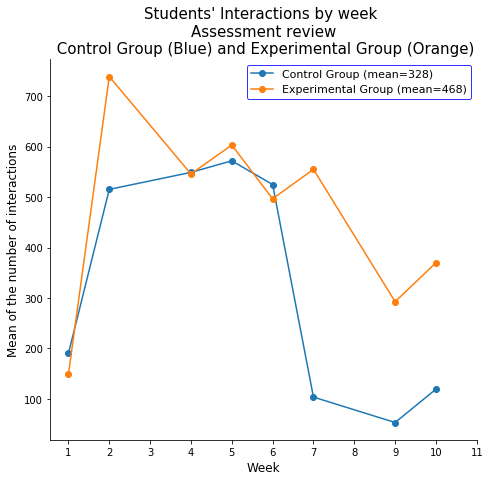

In [10]:
if DELETE_EXAMS:
    aux_mean = df[(df['week'] != 3) & (df['week'] != 8) & (df['week'] != 11)].groupby(['week', 'sec'])[['number_interactions']].mean()
    
else:
    aux_mean = df.groupby(['week', 'sec'])[['number_interactions']].mean()

# aux_mean = df.groupby(['week', 'sec'])[['number_interactions']].mean()

fig = plt.figure(figsize=(26,7))
ax1 = fig.add_subplot(1,3,1)

# plotting
aux_mean['number_interactions'].unstack(level=1).plot.line(ax=ax1, legend='best', marker='o')

# setting title
ax1.set_title('Students\' Interactions by week \n' + interaction_type +'\n Control Group (Blue) and Experimental Group (Orange)', 
              fontsize=15)

# axis Labels
ax1.set_ylabel('Mean of the number of interactions', fontsize=12)
ax1.set_xlabel('Week', fontsize=12)

# tick styles
ax1.tick_params(axis='both', which='major', labelsize=10)
ax1.set_xticks([1,2,3,4,5,6,7,8,9,10,11])

# set cool Legend format
ax1.legend(labels=['Control Group (mean=' + str(int(aux_mean['number_interactions'].unstack(level=1)[1].mean())) +')',
                   'Experimental Group (mean=' + str(int(aux_mean['number_interactions'].unstack(level=1)[2].mean())) +')'], 
           loc='best', 
           fontsize=11, 
           frameon=True).get_frame().set_edgecolor('blue')

# selecting spines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(True)
ax1.spines['left'].set_visible(True)

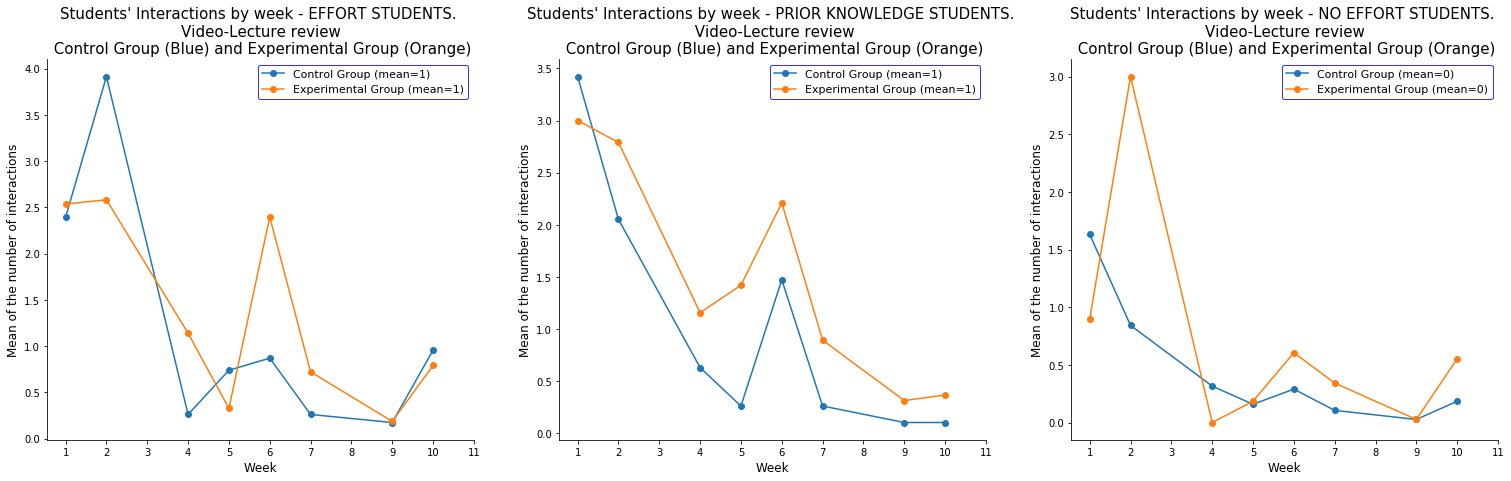

In [107]:
if DELETE_EXAMS:
    aux_mean = df[(df['week'] != 3) & (df['week'] != 8) & (df['week'] != 11)].groupby(['week', 'cluster', 'sec'])[['number_interactions']].mean()
    
else:
    aux_mean = df.groupby(['week', 'cluster', 'sec'])[['number_interactions']].mean()

# aux_mean = df.groupby(['week', 'cluster', 'sec'])[['number_interactions']].mean()

fig, axs = plt.subplots(1,3, figsize=(26, 7))

# plotting
aux_mean['number_interactions'].unstack(level=[1,2])[0].plot(ax=axs[0], legend='best', marker='o')
aux_mean['number_interactions'].unstack(level=[1,2])[1].plot(ax=axs[1], legend='best', marker='o')
aux_mean['number_interactions'].unstack(level=[1,2])[2].plot(ax=axs[2], legend='best', marker='o')

# setting titles
axs[0].set_title('Students\' Interactions by week - EFFORT STUDENTS. \n' + interaction_type +'\n Control Group (Blue) and Experimental Group (Orange)', 
              fontsize=15)
axs[1].set_title('Students\' Interactions by week - PRIOR KNOWLEDGE STUDENTS. \n ' + interaction_type +'\n Control Group (Blue) and Experimental Group (Orange)', 
              fontsize=15)
axs[2].set_title('Students\' Interactions by week - NO EFFORT STUDENTS. \n' + interaction_type +'\n Control Group (Blue) and Experimental Group (Orange)', 
              fontsize=15)

for ax in range(3):
    # axis Labels
    axs[ax].set_ylabel('Mean of the number of interactions', fontsize=12)
    axs[ax].set_xlabel('Week', fontsize=12)
    
    # tick Styles
    axs[ax].tick_params(axis='both', which='major', labelsize=10)
    axs[ax].set_xticks([1,2,3,4,5,6,7,8,9,10,11])
    
# set cool Legend format
axs[0].legend(labels=['Control Group (mean=' + str(int(aux_mean['number_interactions'].unstack(level=[1,2])[0][1].mean())) +')',
                      'Experimental Group (mean=' + str(int(aux_mean['number_interactions'].unstack(level=[1,2])[0][2].mean())) +')'], 
           loc='best', 
           fontsize=11, 
           frameon=True).get_frame().set_edgecolor('blue')
axs[1].legend(labels=['Control Group (mean=' + str(int(aux_mean['number_interactions'].unstack(level=[1,2])[1][1].mean())) +')',
                      'Experimental Group (mean=' + str(int(aux_mean['number_interactions'].unstack(level=[1,2])[1][2].mean())) +')'], 
           loc='best', 
           fontsize=11, 
           frameon=True).get_frame().set_edgecolor('blue')
axs[2].legend(labels=['Control Group (mean=' + str(int(aux_mean['number_interactions'].unstack(level=[1,2])[2][1].mean())) +')',
                      'Experimental Group (mean=' + str(int(aux_mean['number_interactions'].unstack(level=[1,2])[2][2].mean())) +')'], 
           loc='best', 
           fontsize=11, 
           frameon=True).get_frame().set_edgecolor('blue')
# selecting spines
for ax in range(3):
    axs[ax].spines['top'].set_visible(False)
    axs[ax].spines['right'].set_visible(False)
    axs[ax].spines['bottom'].set_visible(True)
    axs[ax].spines['left'].set_visible(True)
    


### (3.2) Timespent

#### (3.2.1) All interactions

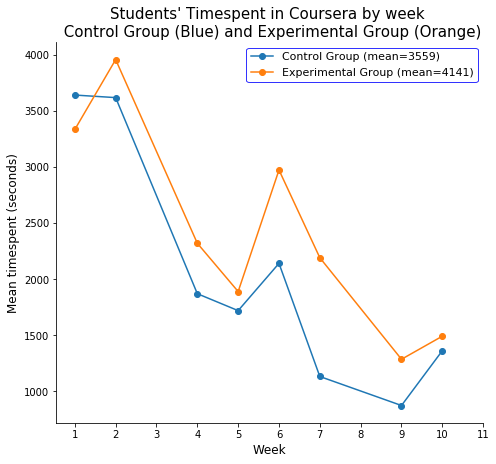

In [99]:
if DELETE_EXAMS:
    aux_mean = df[(df['week'] != 3) & (df['week'] != 8) & (df['week'] != 11)].groupby(['week', 'sec'])[['timespent']].mean()
    
else:
    aux_mean = df.groupby(['week', 'sec'])[['timespent']].mean()
    
# aux_mean = df.groupby(['week', 'sec'])[['timespent']].mean()

fig = plt.figure(figsize=(26,7))
ax1 = fig.add_subplot(1,3,1)

# plotting
aux_mean['timespent'].unstack(level=1).plot.line(ax=ax1, legend='best', marker='o')

# setting title
ax1.set_title('Students\' Timespent in Coursera by week \n Control Group (Blue) and Experimental Group (Orange)', 
              fontsize=15)

# axis Labels
ax1.set_ylabel('Mean timespent (seconds)', fontsize=12)
ax1.set_xlabel('Week', fontsize=12)

# tick styles
ax1.tick_params(axis='both', which='major', labelsize=10)
ax1.set_xticks([1,2,3,4,5,6,7,8,9,10,11])

# set cool Legend format
ax1.legend(labels=['Control Group (mean=3559)','Experimental Group (mean=4141)'], 
           loc='best', 
           fontsize=11, 
           frameon=True).get_frame().set_edgecolor('blue')

# selecting spines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(True)
ax1.spines['left'].set_visible(True)

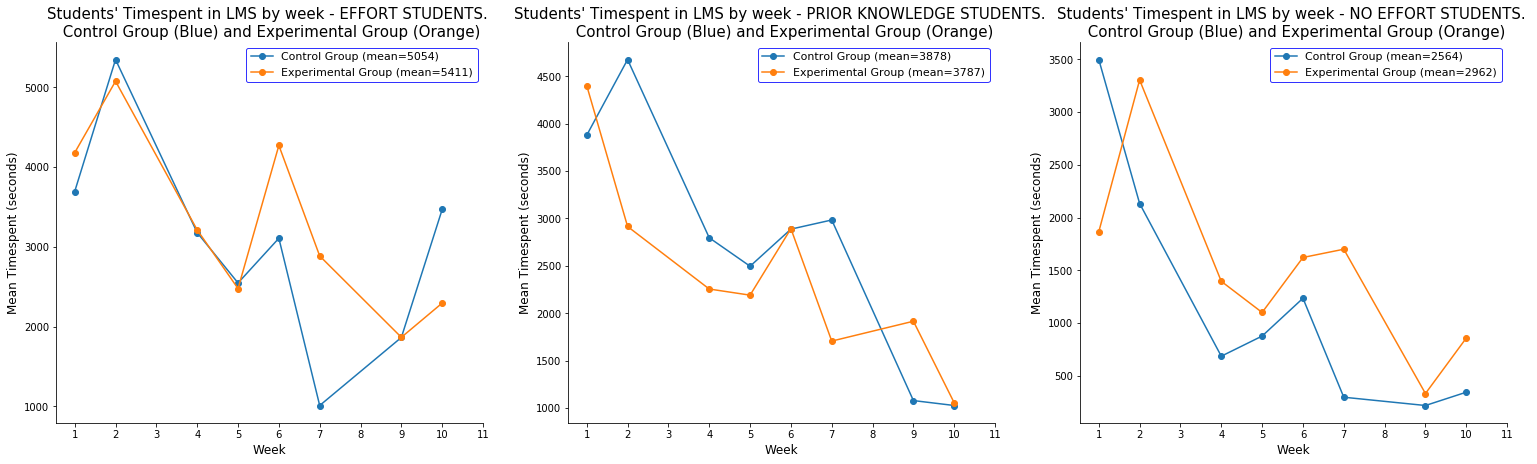

In [101]:
if DELETE_EXAMS:
    aux_mean = df[(df['week'] != 3) & (df['week'] != 8) & (df['week'] != 11)].groupby(['week', 'cluster', 'sec'])[['timespent']].mean()
    
else:
    aux_mean = df.groupby(['week', 'cluster', 'sec'])[['timespent']].mean()

# aux_mean = df.groupby(['week', 'cluster', 'sec'])[['timespent']].mean()

fig, axs = plt.subplots(1,3, figsize=(26, 7))

# plotting
aux_mean['timespent'].unstack(level=[1,2])[0].plot(ax=axs[0], legend='best', marker='o')
aux_mean['timespent'].unstack(level=[1,2])[1].plot(ax=axs[1], legend='best', marker='o')
aux_mean['timespent'].unstack(level=[1,2])[2].plot(ax=axs[2], legend='best', marker='o')

# setting titles
axs[0].set_title('Students\' Timespent in LMS by week - EFFORT STUDENTS. \n Control Group (Blue) and Experimental Group (Orange)', 
              fontsize=15)
axs[1].set_title('Students\' Timespent in LMS by week - PRIOR KNOWLEDGE STUDENTS. \n Control Group (Blue) and Experimental Group (Orange)', 
              fontsize=15)
axs[2].set_title('Students\' Timespent in LMS by week - NO EFFORT STUDENTS. \n Control Group (Blue) and Experimental Group (Orange)', 
              fontsize=15)

for ax in range(3):
    # axis Labels
    axs[ax].set_ylabel('Mean Timespent (seconds)', fontsize=12)
    axs[ax].set_xlabel('Week', fontsize=12)
    
    # tick Styles
    axs[ax].tick_params(axis='both', which='major', labelsize=10)
    axs[ax].set_xticks([1,2,3,4,5,6,7,8,9,10,11])
    
# set cool Legend format
axs[0].legend(labels=['Control Group (mean=5054)','Experimental Group (mean=5411)'], 
           loc='best', 
           fontsize=11, 
           frameon=True).get_frame().set_edgecolor('blue')
axs[1].legend(labels=['Control Group (mean=3878)','Experimental Group (mean=3787)'], 
           loc='best', 
           fontsize=11, 
           frameon=True).get_frame().set_edgecolor('blue')
axs[2].legend(labels=['Control Group (mean=2564)','Experimental Group (mean=2962)'], 
           loc='best', 
           fontsize=11, 
           frameon=True).get_frame().set_edgecolor('blue')

# selecting spines
for ax in range(3):
    axs[ax].spines['top'].set_visible(False)
    axs[ax].spines['right'].set_visible(False)
    axs[ax].spines['bottom'].set_visible(True)
    axs[ax].spines['left'].set_visible(True)

#### (3.2.2) By Interaction Type

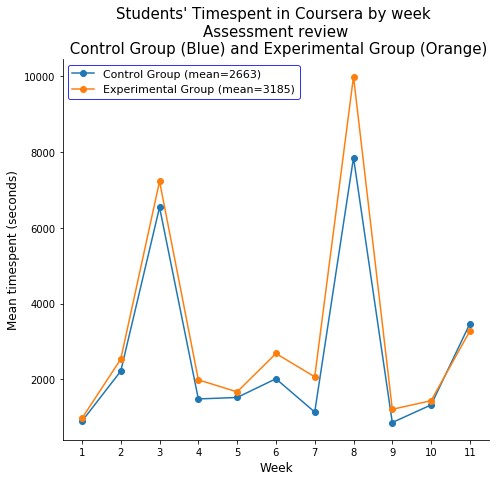

In [411]:
aux_mean = df.groupby(['week', 'sec'])[['timespent']].mean()

fig = plt.figure(figsize=(26,7))
ax1 = fig.add_subplot(1,3,1)

# plotting
aux_mean['timespent'].unstack(level=1).plot.line(ax=ax1, legend='best', marker='o')

# setting title
ax1.set_title('Students\' Timespent in Coursera by week \n' + interaction_type +'\n Control Group (Blue) and Experimental Group (Orange)', 
              fontsize=15)

# axis Labels
ax1.set_ylabel('Mean timespent (seconds)', fontsize=12)
ax1.set_xlabel('Week', fontsize=12)

# tick styles
ax1.tick_params(axis='both', which='major', labelsize=10)
ax1.set_xticks([1,2,3,4,5,6,7,8,9,10,11])

# set cool Legend format
ax1.legend(labels=['Control Group (mean=' + str(int(aux_mean['timespent'].unstack(level=1)[1].mean())) +')',
                   'Experimental Group (mean=' + str(int(aux_mean['timespent'].unstack(level=1)[2].mean())) +')'], 
           loc='best', 
           fontsize=11, 
           frameon=True).get_frame().set_edgecolor('blue')

# selecting spines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(True)
ax1.spines['left'].set_visible(True)

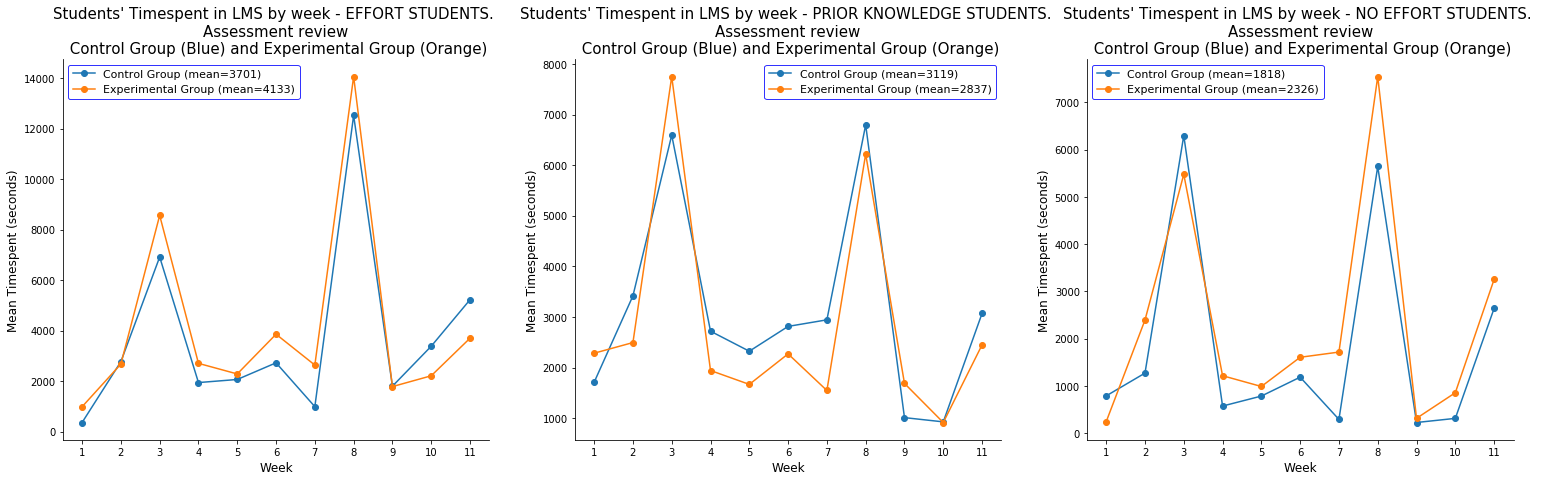

In [412]:
aux_mean = df.groupby(['week', 'cluster', 'sec'])[['timespent']].mean()

fig, axs = plt.subplots(1,3, figsize=(26, 7))

# plotting
aux_mean['timespent'].unstack(level=[1,2])[0].plot(ax=axs[0], legend='best', marker='o')
aux_mean['timespent'].unstack(level=[1,2])[1].plot(ax=axs[1], legend='best', marker='o')
aux_mean['timespent'].unstack(level=[1,2])[2].plot(ax=axs[2], legend='best', marker='o')

# setting titles
axs[0].set_title('Students\' Timespent in LMS by week - EFFORT STUDENTS. \n' + interaction_type +'\n Control Group (Blue) and Experimental Group (Orange)', 
              fontsize=15)
axs[1].set_title('Students\' Timespent in LMS by week - PRIOR KNOWLEDGE STUDENTS. \n' + interaction_type +'\n Control Group (Blue) and Experimental Group (Orange)', 
              fontsize=15)
axs[2].set_title('Students\' Timespent in LMS by week - NO EFFORT STUDENTS. \n' + interaction_type +'\n Control Group (Blue) and Experimental Group (Orange)', 
              fontsize=15)

for ax in range(3):
    # axis Labels
    axs[ax].set_ylabel('Mean Timespent (seconds)', fontsize=12)
    axs[ax].set_xlabel('Week', fontsize=12)
    
    # tick Styles
    axs[ax].tick_params(axis='both', which='major', labelsize=10)
    axs[ax].set_xticks([1,2,3,4,5,6,7,8,9,10,11])
    
    # set cool Legend format
    axs[ax].legend(labels=['Control Group (mean=' + str(int(aux_mean['timespent'].unstack(level=[1,2])[ax][1].mean())) +')',
                          'Experimental Group (mean=' + str(int(aux_mean['timespent'].unstack(level=[1,2])[ax][2].mean())) +')'], 
               loc='best', 
               fontsize=11, 
               frameon=True).get_frame().set_edgecolor('blue')


# selecting spines
for ax in range(3):
    axs[ax].spines['top'].set_visible(False)
    axs[ax].spines['right'].set_visible(False)
    axs[ax].spines['bottom'].set_visible(True)
    axs[ax].spines['left'].set_visible(True)

### (3.3) Number Interactions and Grade

In [147]:
df = pd.merge(left=df, right=df_grades, left_on=['num_alumno', 'week'], right_on=['num_alumno', 'week'])

Text(10, 2, 'Correlation Sec2= 0.22731759648523744')

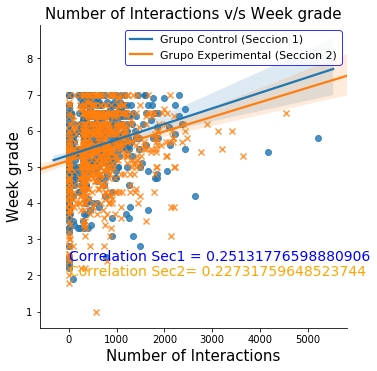

In [155]:
DELETE_EXAMS = False
if DELETE_EXAMS:
    df = df[(df['week'] != 3) & (df['week'] != 8) & (df['week'] != 11)]
    
else:
    pass


sns.lmplot(x='number_interactions',y='FC', hue='sec', markers=["o", "x"],
           data=df, fit_reg=True, height=5, legend=False)

ax = plt.gca()

# Set Axis labels
ax.set_xlabel('Number of Interactions', fontsize=15)
ax.set_ylabel('Week grade', fontsize=15)

# Grid
# ax.grid(True)

# Setting Titles
ax.set_title('Number of Interactions v/s Week grade', fontsize=15)

# # Set cool Legend format
ax.legend(loc='best', fontsize=11, frameon=True, labels=['Grupo Control (Seccion 1)','Grupo Experimental (Seccion 2)']).get_frame().set_edgecolor('blue')

# Annotations
ax.annotate(s='Correlation Sec1 = ' + str(df[df['sec'] == 1][['FC', 'number_interactions']].corr().iloc[0,1]), xy=(10,2.4), size=14, color = 'b') 
ax.annotate(s='Correlation Sec2= ' + str(df[df['sec'] == 2][['FC', 'number_interactions']].corr().iloc[0,1]), xy=(10,2), size=14, color = 'orange') 



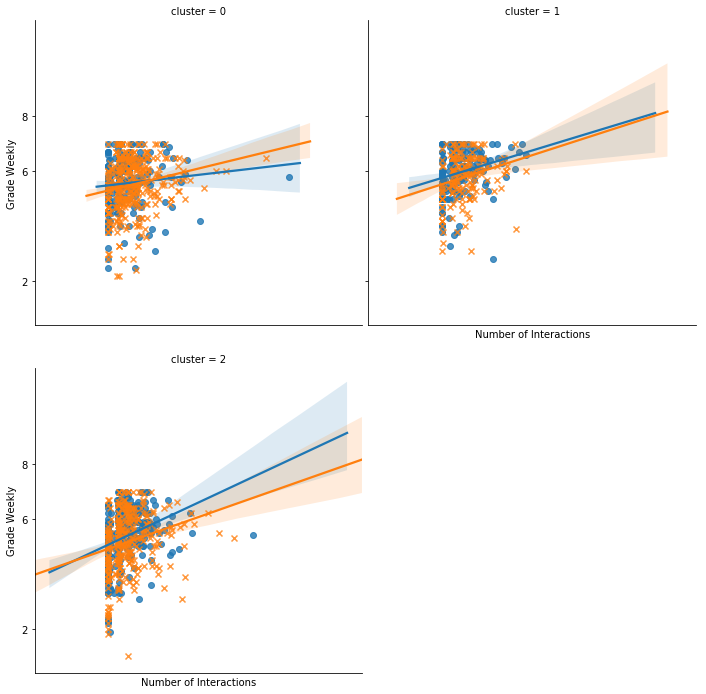

In [167]:
DELETE_EXAMS = False
if DELETE_EXAMS:
    df = df[(df['week'] != 3) & (df['week'] != 8) & (df['week'] != 11)]
    
else:
    pass

g = sns.lmplot(x='number_interactions',y='FC', hue='sec', 
           data=df, col='cluster', height=5, legend=False, col_wrap=2, markers=["o", "x"])

g = (g.set_axis_labels("Number of Interactions", "Grade Weekly")
     .set( 
          xticks=[], yticks=[2, 6, 8])
     .fig.subplots_adjust(wspace=.02))

### (3.4) Timespent and Grade

In [154]:
df.head()

,num_alumno,week,number_interactions,timespent,sec,cluster,FC
0,10635815,1.0,852.0,6271.680800,2,0,5.4
1,10635815,2.0,1401.0,3093.770077,2,0,4.4
3,10635815,4.0,1014.0,3585.809314,2,0,5.7
4,10635815,5.0,858.0,7841.223677,2,0,5.4
5,10635815,6.0,260.0,6440.468750,2,0,2.2


Text(11000, 2, 'Correlation Sec2= 0.17925201119422335')

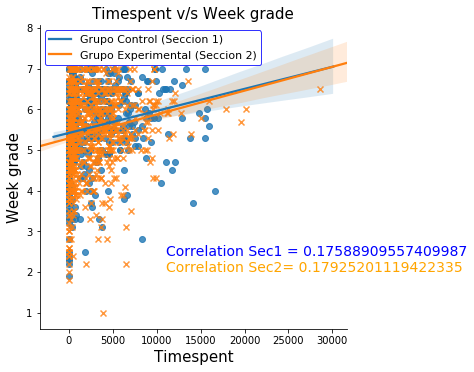

In [163]:
DELETE_EXAMS = False
if DELETE_EXAMS:
    df = df[(df['week'] != 3) & (df['week'] != 8) & (df['week'] != 11)]
    
else:
    pass


sns.lmplot(x='timespent',y='FC', hue='sec', markers=["o", "x"],
           data=df, fit_reg=True, height=5, legend=False)

ax = plt.gca()

# Set Axis labels
ax.set_xlabel('Timespent', fontsize=15)
ax.set_ylabel('Week grade', fontsize=15)

# Grid
# ax.grid(True)

# Setting Titles
ax.set_title('Timespent v/s Week grade', fontsize=15)

# # Set cool Legend format
ax.legend(loc='best', fontsize=11, frameon=True, labels=['Grupo Control (Seccion 1)','Grupo Experimental (Seccion 2)']).get_frame().set_edgecolor('blue')

# Annotations
ax.annotate(s='Correlation Sec1 = ' + str(df[df['sec'] == 1][['FC', 'timespent']].corr().iloc[0,1]), xy=(11000,2.4), size=14, color = 'b') 
ax.annotate(s='Correlation Sec2= ' + str(df[df['sec'] == 2][['FC', 'timespent']].corr().iloc[0,1]), xy=(11000,2), size=14, color = 'orange') 



In [18]:
g = sns.lmplot(x='timespent',y='FC', hue='sec', 
           data=df, col='cluster', height=5, legend=False, col_wrap=2, markers=["o", "x"])

g = (g.set_axis_labels("Timespent", "Grade Weekly")
#      .set( 
#           xticks=[], yticks=[2, 6, 8])
     .fig.subplots_adjust(wspace=.02))

KeyError: "['FC'] not in index"

### (3.5) Timespent and Auto-reported dedicated Time

In [23]:
df_dedicated['dedicated_watch_videos_hours'] = df_dedicated['dedicated_watch_videos_hours'] * 3600
df_dedicated['dedicated_coursera_quiz_hours'] = df_dedicated['dedicated_coursera_quiz_hours'] * 3600

In [24]:
df_dedicated.head(2)

,num_alumno,week,dedicated_watch_videos_hours,dedicated_coursera_quiz_hours
0,15635236,11,7200.0,0.0
1,15622606,11,1800.0,360.0


In [25]:
# interaction_type = 'quiz'
interaction_type = 'videos'

if interaction_type == 'videos':
    aux_timespent = df_interactions[(df_interactions['interaction'] == 'Video-Lecture begin') | 
                                   (df_interactions['interaction'] == 'Video-Lecture completed') | 
                                   (df_interactions['interaction'] == 'Video-Lecture review')][['num_alumno', 'week', 'timespent']].groupby(['num_alumno', 'week']).sum()
    
    col = 'dedicated_watch_videos_hours'
else:
    aux_timespent = df_interactions[(df_interactions['interaction'] == 'Assessment try') | 
                                   (df_interactions['interaction'] == 'Assessment pass') | 
                                   (df_interactions['interaction'] == 'Assessment review')][['num_alumno', 'week', 'timespent']].groupby(['num_alumno', 'week']).sum()
    
    col = 'dedicated_coursera_quiz_hours'
    
df_timespent = pd.melt(aux_timespent['timespent'].unstack(level=1).reset_index(), id_vars=['num_alumno'], value_name='timespent')

df_timespent.fillna(0, inplace=True)

del aux_timespent

# merging all data
df = pd.merge(left=df_dedicated, right=df_timespent, left_on=['num_alumno', 'week'], right_on=['num_alumno', 'week'])
df = pd.merge(left=df, right=df_sec, left_on='num_alumno', right_on='num_alumno')
df = pd.merge(left=df, right=df_clusters, left_on='num_alumno', right_on='num_alumno')

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(9000, 1, 'Correlation Sec2= 0.19576801996183926')

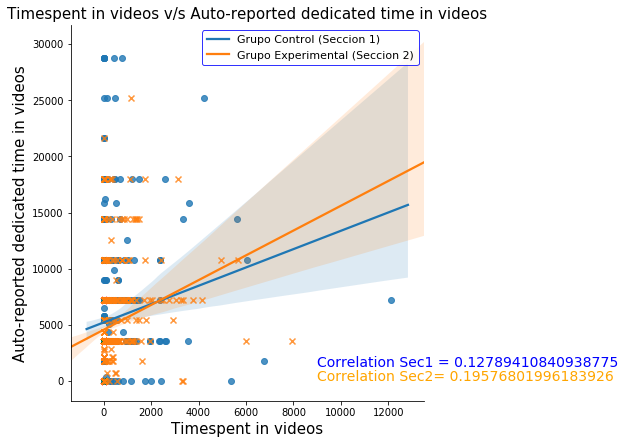

In [26]:
DELETE_EXAMS = False
if DELETE_EXAMS:
    df = df[(df['week'] != 3) & (df['week'] != 8) & (df['week'] != 11)]
    
else:
    pass

sns.lmplot(x='timespent',y=col, hue='sec', markers=["o", "x"],
           data=df, fit_reg=True, height=6, legend=False)

ax = plt.gca()

# Set Axis labels
ax.set_xlabel('Timespent in ' + interaction_type, fontsize=15)
ax.set_ylabel('Auto-reported dedicated time in ' + interaction_type, fontsize=15)

# Grid
# ax.grid(True)

# Setting Titles
ax.set_title('Timespent in ' + interaction_type +' v/s Auto-reported dedicated time in ' +interaction_type, fontsize=15)

# # Set cool Legend format
ax.legend(loc='best', fontsize=11, frameon=True, labels=['Grupo Control (Seccion 1)','Grupo Experimental (Seccion 2)']).get_frame().set_edgecolor('blue')

# Annotations
ax.annotate(s='Correlation Sec1 = ' + str(df[df['sec'] == 1][[col, 'timespent']].corr().iloc[0,1]), xy=(9000,1300), size=14, color = 'b') 
ax.annotate(s='Correlation Sec2= ' + str(df[df['sec'] == 2][[col, 'timespent']].corr().iloc[0,1]), xy=(9000,1), size=14, color = 'orange') 



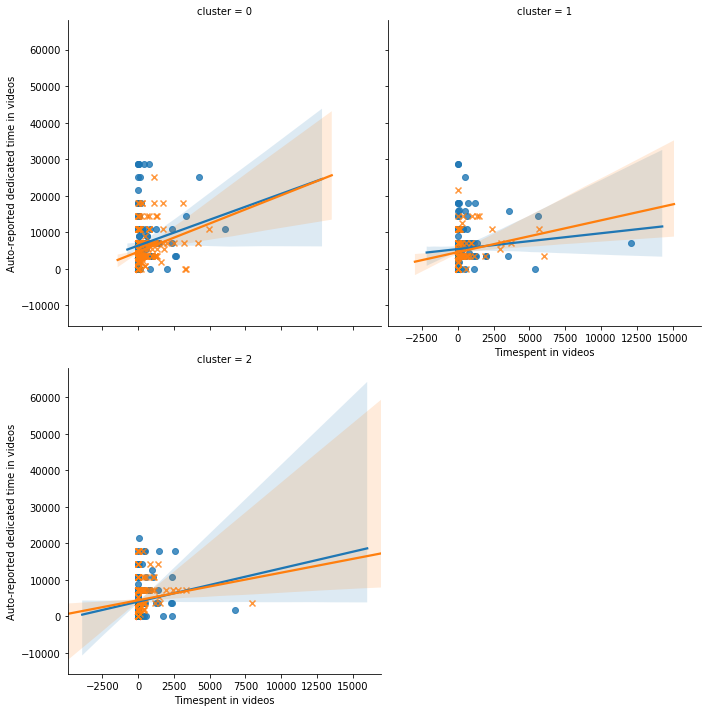

In [27]:
g = sns.lmplot(x='timespent',y=col, hue='sec', 
           data=df, col='cluster', height=5, legend=False, col_wrap=2, markers=["o", "x"])

g = (g.set_axis_labels('Timespent in ' + interaction_type, 'Auto-reported dedicated time in ' + interaction_type)
#      .set( 
#           xticks=[], yticks=[2, 6, 8])
     .fig.subplots_adjust(wspace=.02))

In [14]:
df_interactions.interaction.unique()

array(['Assessment try', 'Video-Lecture begin', 'Video-Lecture completed',
       'Video-Lecture review', 'Reading completed', 'Assessment pass',
       'Assessment review', 'Reading review'], dtype=object)

## Part 4: Hypothesis Testing

In [10]:
# interaction_type = 'Assessment review'
interaction_type = ''

if interaction_type != '':
    aux_number_interactions = df_interactions[df_interactions['interaction'] == interaction_type][['num_alumno', 'week', 'interaction']].groupby(['num_alumno', 'week']).count()
    aux_timespent = df_interactions[df_interactions['interaction'] == interaction_type][['num_alumno', 'week', 'timespent']].groupby(['num_alumno', 'week']).sum()
    
else:
    aux_number_interactions = df_interactions[['num_alumno', 'week', 'interaction']].groupby(['num_alumno', 'week']).count()
    aux_timespent = df_interactions[['num_alumno', 'week', 'timespent']].groupby(['num_alumno', 'week']).sum()

In [11]:
aux_interac = aux_number_interactions['interaction'].unstack(level=1).reset_index().fillna(0)
aux_interac = pd.merge(left=aux_interac, right=df_sec, left_on='num_alumno', right_on='num_alumno')
aux_interac = pd.merge(left=aux_interac, right=df_clusters, left_on='num_alumno', right_on='num_alumno')

In [12]:
aux_timespent = aux_timespent['timespent'].unstack(level=1).reset_index().fillna(0)
aux_timespent = pd.merge(left=aux_timespent, right=df_sec, left_on='num_alumno', right_on='num_alumno')
aux_timespent = pd.merge(left=aux_timespent, right=df_clusters, left_on='num_alumno', right_on='num_alumno')


In [14]:
def t_test(data1, data2, variables=[]):
    data = {'item': [], 'mean1': [], 'std1': [], 'mean2': [], 'std2': [], 't': [], 'p': []}
    for var in variables:
        data['item'].append(var)
#         print('VARIABLE: ', var)
        
        data1_mean = data1[var].mean()
        data2_mean = data2[var].mean()
        data['mean1'].append(data1_mean)
        data['mean2'].append(data2_mean)
#         print("data1 mean value:", data1_mean)
#         print("data2 mean value:", data2_mean)
#         print("data1 m:", len(data1[var]))

        
        data1_std = data1[var].std()
        data2_std = data2[var].std()
        data['std1'].append(data1_std)
        data['std2'].append(data2_std)
#         print("data1 std value:",data1_std)
#         print("data2 std value:",data2_std)
        
        ttest,pval = ttest_ind(data1[var],data2[var])
        data['t'].append(ttest)
        data['p'].append(pval)
#         print("t-value",ttest)
#         print("p-value",pval)
#         print()
        
    return pd.DataFrame(data)
        

In [15]:
variables = [1,2,3,4,5,6,7,8,9,10,11]

In [15]:
aux_interac

,num_alumno,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,sec,cluster
0,10635815,852.0,1401.0,6343.0,1014.0,858.0,260.0,624.0,562.0,52.0,1013.0,613.0,2,0
1,1162390J,667.0,2307.0,439.0,1325.0,910.0,936.0,546.0,0.0,207.0,0.0,1.0,1,1
2,12208884,405.0,2147.0,988.0,312.0,572.0,0.0,0.0,2051.0,0.0,883.0,0.0,2,2
3,12636029,598.0,1141.0,2658.0,864.0,0.0,538.0,0.0,1372.0,104.0,207.0,14.0,2,2
4,13620789,872.0,440.0,1300.0,312.0,312.0,546.0,832.0,312.0,0.0,104.0,10.0,1,2
5,13621254,78.0,1066.0,2363.0,858.0,1003.0,520.0,390.0,1482.0,286.0,0.0,587.0,2,0
6,13622048,0.0,2431.0,3141.0,441.0,1300.0,585.0,0.0,494.0,0.0,413.0,2429.0,1,2
7,13622986,1000.0,1742.0,1193.0,1014.0,572.0,962.0,312.0,874.0,598.0,0.0,232.0,2,1
8,13632701,780.0,286.0,2678.0,754.0,806.0,234.0,442.0,1664.0,520.0,364.0,545.0,2,0
9,13633589,745.0,2366.0,858.0,1118.0,910.0,624.0,0.0,1066.0,0.0,0.0,16.0,1,2


In [16]:
data1, data2 = aux_interac[aux_interac['sec'] == 1], aux_interac[aux_interac['sec'] == 2]
aux = t_test(data1, data2, variables)
# aux.to_csv('../../results/h2_number_interactions_sections.csv', index=False)
aux

,item,mean1,std1,mean2,std2,t,p
0,1,190.097561,421.216979,148.961165,301.773124,0.773006,4.405164e-01
1,2,515.256098,666.450128,738.757282,783.652652,-2.057176,4.108789e-02
2,3,1107.158537,1033.033714,1402.135922,1146.158332,-1.815990,7.100843e-02
3,4,548.902439,403.973065,545.776699,429.028084,0.050511,9.597701e-01
4,5,571.841463,441.879864,603.106796,549.530565,-0.418553,6.760337e-01
5,6,524.878049,414.151174,496.553398,466.266286,0.431088,6.669117e-01
6,7,103.658537,232.826869,554.922330,487.282474,-7.711438,7.709734e-13
7,8,835.829268,805.423894,1170.058252,1021.367133,-2.423137,1.636116e-02
8,9,53.256098,121.612907,292.699029,291.889344,-6.959954,5.878545e-11
9,10,119.329268,190.465645,369.834951,343.004519,-5.924102,1.525909e-08


In [17]:
data1, data2 = aux_timespent[aux_timespent['sec'] == 1], aux_timespent[aux_timespent['sec'] == 2]
aux = t_test(data1, data2, variables)
# aux.to_csv('../../results/h2_timespent_sections.csv', index=False)
aux

,item,mean1,std1,mean2,std2,t,p
0,1,892.599324,1941.184938,968.082305,2812.591338,-0.206890,0.836326
1,2,2214.869019,3480.096987,2531.863164,3134.686650,-0.650616,0.516110
2,3,6542.899139,6121.796281,7229.586528,6509.650333,-0.731724,0.465273
3,4,1480.197769,2208.764662,1984.579538,2274.566604,-1.517579,0.130846
4,5,1518.605651,2264.803456,1667.244128,2171.711600,-0.453744,0.650551
5,6,2013.568366,2571.840124,2681.115773,3418.511777,-1.467932,0.143839
6,7,1133.160397,2770.383692,2065.237117,2613.449779,-2.346398,0.020026
7,8,7854.446461,6841.714319,9996.332116,7842.501714,-1.951435,0.052532
8,9,857.707876,2270.363662,1206.875496,2070.994695,-1.091482,0.276496
9,10,1322.785006,3082.456596,1433.158366,2367.810577,-0.275446,0.783285


In [84]:
c = 2
data1, data2 = aux_interac[(aux_interac['sec'] == 1) & (aux_interac['cluster'] == c)], aux_interac[(aux_interac['sec'] == 2) & (aux_interac['cluster'] == c)]
aux = t_test(data1, data2, variables)
# aux.to_csv('../../results/h2_number_interac_cluster' + str(c) + '.csv', index=False)
aux

,item,mean1,std1,mean2,std2,t,p
0,1,628.658537,759.938044,509.700,568.395096,0.796258,0.428268
1,2,831.536585,623.375693,1162.700,751.859002,-2.160218,0.033787
2,3,1641.682927,1229.417798,1640.950,798.506682,0.003173,0.997476
3,4,573.073171,344.137937,664.025,490.571278,-0.967924,0.336036
4,5,610.682927,399.244063,602.750,486.477172,0.080313,0.936191
5,6,518.829268,419.072184,481.125,407.164881,0.410555,0.682511
6,7,57.682927,215.307738,538.625,566.076949,-5.077336,0.000002
7,8,860.560976,841.780941,1030.700,720.048510,-0.976425,0.331834
8,9,19.609756,66.559702,197.525,244.272125,-4.496385,0.000023
9,10,52.585366,112.438867,324.725,334.551747,-4.931578,0.000004


In [89]:
c = 2
data1, data2 = aux_timespent[(aux_timespent['sec'] == 1) & (aux_timespent['cluster'] == c)], aux_timespent[(aux_timespent['sec'] == 2) & (aux_timespent['cluster'] == c)]
aux = t_test(data1, data2, variables)
# aux.to_csv('../../results/h2_timespent_cluster' + str(c) + '.csv', index=False)
aux

,item,mean1,std1,mean2,std2,t,p
0,1,3497.835030,3586.680023,1865.585956,2025.944680,2.513286,0.013996
1,2,2133.313293,2633.920179,3304.566767,2759.896880,-1.954223,0.054214
2,3,7943.152760,5701.597355,7758.207755,5728.188612,0.145622,0.884591
3,4,685.655481,867.094789,1395.389488,1508.535931,-2.603955,0.011005
4,5,876.578732,1189.775646,1100.318789,1285.974397,-0.813078,0.418617
5,6,1234.827735,1879.824132,1621.520169,1851.204300,-0.932592,0.353872
6,7,296.692080,1403.640120,1699.856227,2281.754026,-3.342615,0.001270
7,8,6778.171080,6004.248922,8024.688098,6218.350772,-0.917854,0.361489
8,9,218.176366,952.817930,331.737404,514.604630,-0.665016,0.507977
9,10,344.426952,874.049140,857.970185,1666.565615,-1.742819,0.085256


In [95]:
val = 0.0852563920135223

if val < 0.1:
    print(1)
    
if val < 0.05:
    print(2)
    
if val < 0.001:
    print(3)

1
